# Explorary Data Analysis

The objective of this notebook is explore the dataset, and understand the various aspects of the dataset. The dataset is located [here]:https://archive.ics.uci.edu/ml/datasets/News+Aggregator 

Author: _Avijeet Kartikay_

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy as sp

sns.set(style="dark", palette="deep")
nlp = sp.load('en')

In [2]:
# Read the dataset into a pandas dataframe and interpret the timestamp from 'TIMESTAMP' field
news = pd.read_csv('../dataset/uci-news-aggregator.csv')
news['TIMESTAMP'] = pd.to_datetime(news['TIMESTAMP'], unit='ms')

In [3]:
# view the dataset
news.head(5)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,2014-03-10 16:52:50.698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,2014-03-10 16:52:51.207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,2014-03-10 16:52:52.027


In [4]:
# # Create a dataframe with the ID and entities in the headline
# sentence_dict = {}
# for post in news.iterrows():
#     sentence_dict[post[1]['ID']] = get_ent_counts(post[1]['TITLE'])

# sentence_df = pd.DataFrame(sentence_dict).T.reset_index().fillna(0)

# # Create a dataframe with the ID and various POS in the headline
# sentence_dict = {}
# for post in news.iterrows():
#     sentence_dict[post[1]['ID']] = get_pos_counts(post[1]['TITLE'])

# sentence_df = pd.DataFrame(sentence_dict).T.reset_index().fillna(0)

# # Method to find the part of speech and their counts in the text
# def get_pos_counts(text):
#     processed_txt = nlp(text)
#     pos_dict = {}
#     for token in processed_txt:
#         if token.pos_ in pos_dict.keys():
#             pos_dict[token.pos_] += 1
#         else:
#             pos_dict[token.pos_] = 1
#     return pos_dict

# # Method to find the various entities and their counts in the text
# def get_ent_counts(text):
#     processed_txt = nlp(text)
#     ent_dict = {}
#     for ent in processed_txt.ents:
#         if ent.label_ in ent_dict.keys():
#             ent_dict[ent.label_] += 1
#         else:
#             ent_dict[ent.label_] = 1
#     return ent_dict

# As the processing of the 400k rows is computationly expensive and time-consuming, the above section 
# is commented out as the extracted data from the headline is already saved in  ../dataset/ dir
# news_entity = pd.read_csv('../dataset/ent_news.csv')
# news_pos = pd.read_csv('../dataset/news_pos.csv')

In [5]:
# View the two datasets
# news_entity.head(5)

In [6]:
# news_pos.head(5)

In [7]:
# news_lang = pd.merge(news_pos.drop('CATEGORY',axis=1), news_entity, on='ID')
news_lang = pd.read_csv('../dataset/news_lang.csv')

In [8]:
news_lang.shape

(422410, 37)

In [9]:
# Generate a holdout set to test the model on
X = news_lang.drop('CATEGORY',axis=1)
y = news_lang['CATEGORY']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, 
                                                    stratify=y, shuffle=True)

In [10]:
news_train = X_train.reset_index(drop=True)
news_train['CATEGORY'] = list(y_train)

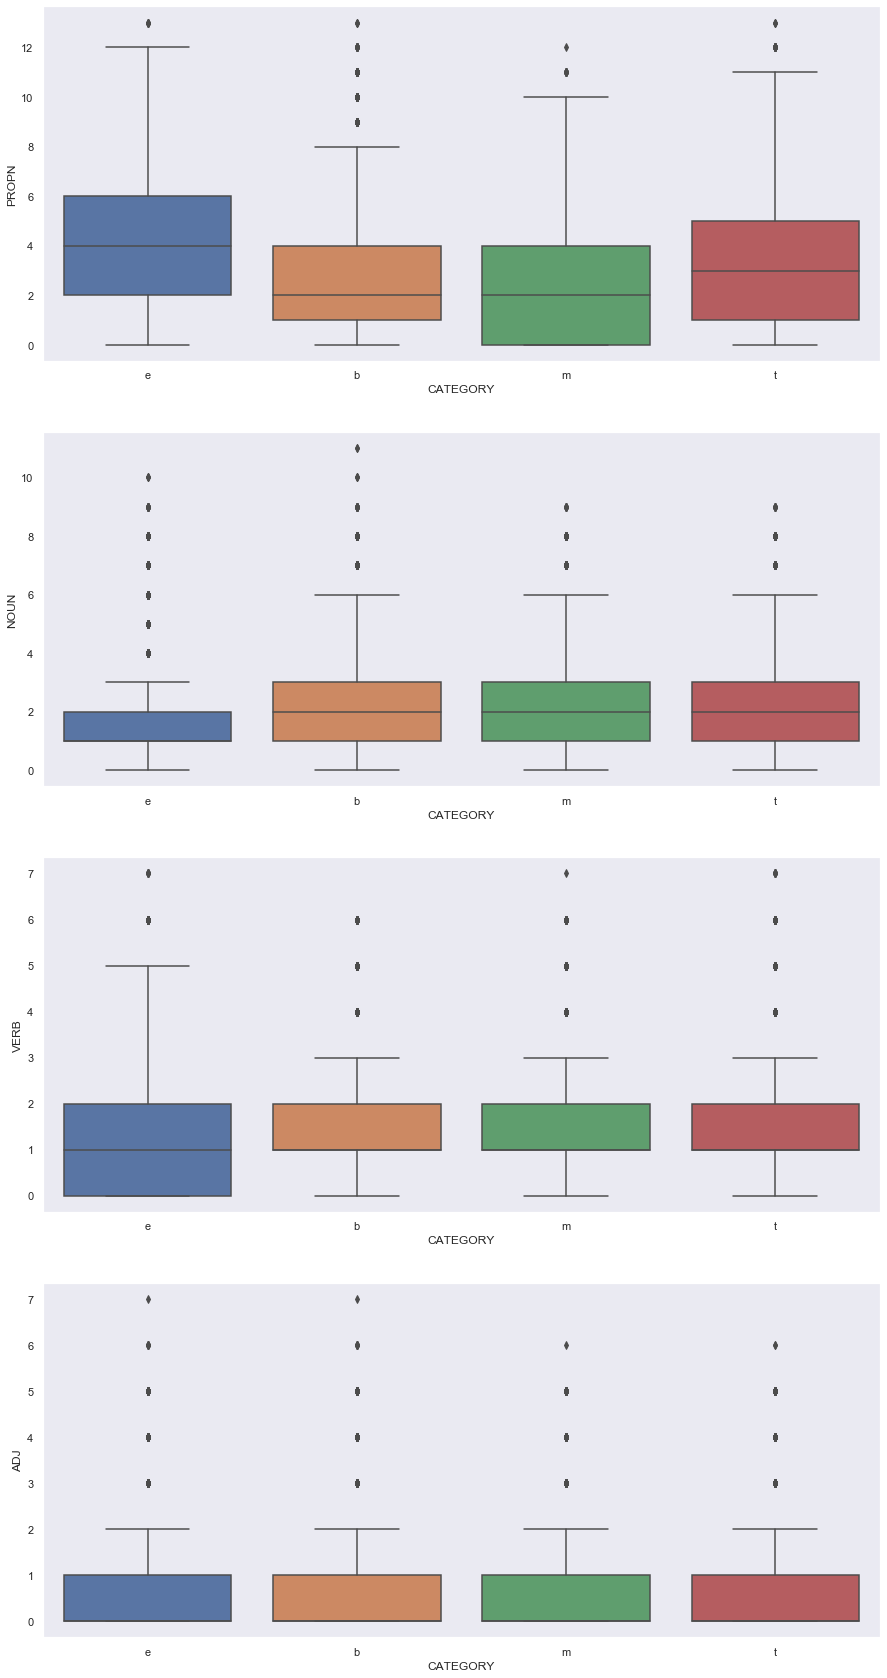

In [11]:
# temp = news_pos.groupby('CATEGORY')[['PROPN','NOUN','VERB','ADJ']].mean().reset_index()
# sns.barplot(x='CATEGORY', y = 'NOUN', data=temp)

cat_map = {
    'b': 'Business',
    't': 'Science',
    'e': 'Entertainment',
    'm': 'Health'
}

f = plt.figure(figsize=(15, 30))
gs = f.add_gridspec(4, 1)
# for each in ['PROPN','NOUN','VERB','ADJ']:
ax = f.add_subplot(gs[0, 0])
sns.boxplot(ax=ax, x="CATEGORY", y='PROPN', data=news_train)

ax = f.add_subplot(gs[1, 0])
sns.boxplot(ax=ax, x="CATEGORY", y='NOUN', data=news_train)

ax = f.add_subplot(gs[2, 0])
sns.boxplot(ax=ax, x="CATEGORY", y='VERB', data=news_train)

ax = f.add_subplot(gs[3, 0])
sns.boxplot(ax=ax, x="CATEGORY", y='ADJ', data=news_train)


# ax.set_xlabel('')
#     ax.set_xticklabels([cat_map[x.get_text()] for x in ax.get_xticklabels()], rotation=45)
#     plt.show()

In [12]:
news_lang.describe()


,ID,PROPN,NOUN,VERB,ADJ,ADP,PUNCT,ADV,PART,DET,...,TIME,MONEY,NORP,ORDINAL,LAW,PRODUCT,EVENT,FAC,QUANTITY,LANGUAGE
count,422410.000000,422410.000000,422410.000000,422410.000000,422410.000000,422410.000000,422410.000000,422410.000000,422410.000000,422410.000000,...,422410.000000,422410.000000,422410.000000,422410.000000,422410.000000,422410.000000,422410.000000,422410.000000,422410.000000,422410.000000
mean,211537.569856,3.281499,1.930111,1.241003,0.509929,0.994505,1.129400,0.235070,0.373301,0.356462,...,0.009446,0.042184,0.042577,0.019988,0.002211,0.013262,0.005343,0.007871,0.002322,0.000246
std,122103.132320,2.317425,1.512999,0.984283,0.737856,0.836748,1.301534,0.523686,0.589163,0.631699,...,0.098476,0.205228,0.210141,0.141439,0.047071,0.117438,0.073258,0.089648,0.048819,0.016281
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,105802.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,211657.500000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,317274.750000,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,422937.000000,15.000000,11.000000,8.000000,7.000000,7.000000,16.000000,6.000000,5.000000,6.000000,...,3.000000,3.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,3.000000


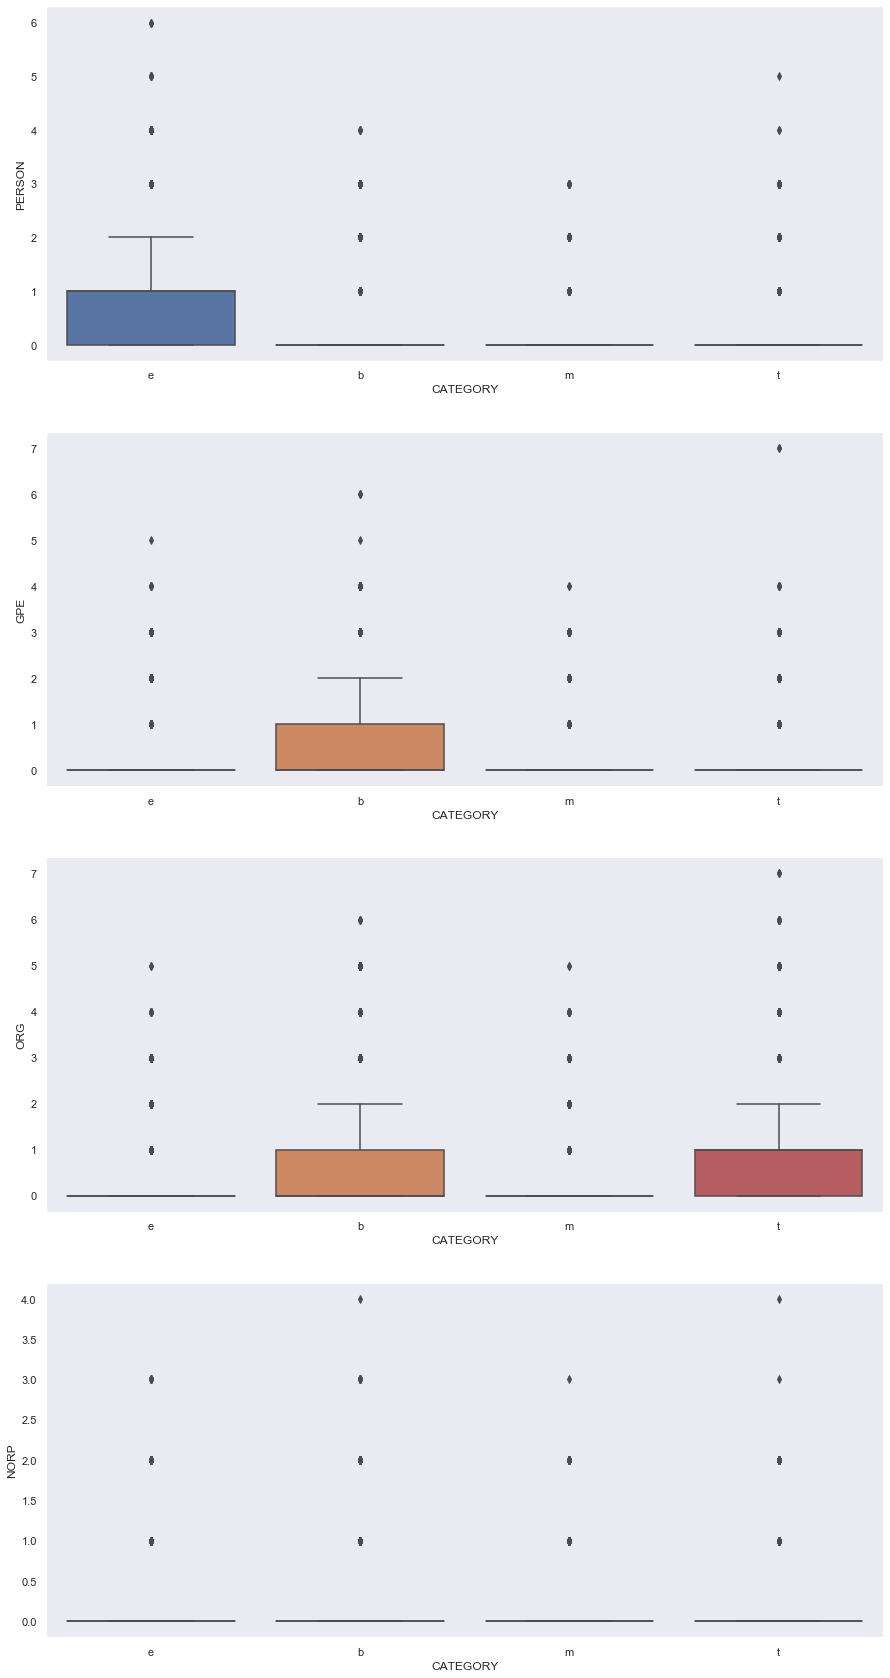

In [13]:
# temp = news_pos.groupby('CATEGORY')[['PROPN','NOUN','VERB','ADJ']].mean().reset_index()
# sns.barplot(x='CATEGORY', y = 'NOUN', data=temp)

cat_map = {
    'b': 'Business',
    't': 'Science',
    'e': 'Entertainment',
    'm': 'Health'
}

f = plt.figure(figsize=(15, 30))
gs = f.add_gridspec(4, 1)
# for each in ['PROPN','NOUN','VERB','ADJ']:
ax = f.add_subplot(gs[0, 0])
sns.boxplot(ax=ax, x="CATEGORY", y='PERSON', data=news_train)

ax = f.add_subplot(gs[1, 0])
sns.boxplot(ax=ax, x="CATEGORY", y='GPE', data=news_train)

ax = f.add_subplot(gs[2, 0])
sns.boxplot(ax=ax, x="CATEGORY", y='ORG', data=news_train)

ax = f.add_subplot(gs[3, 0])
sns.boxplot(ax=ax, x="CATEGORY", y='NORP', data=news_train)


# ax.set_xlabel('')
#     ax.set_xticklabels([cat_map[x.get_text()] for x in ax.get_xticklabels()], rotation=45)
#     plt.show()

In [14]:
news_df = pd.merge(news_lang['ID'], news, on='ID')

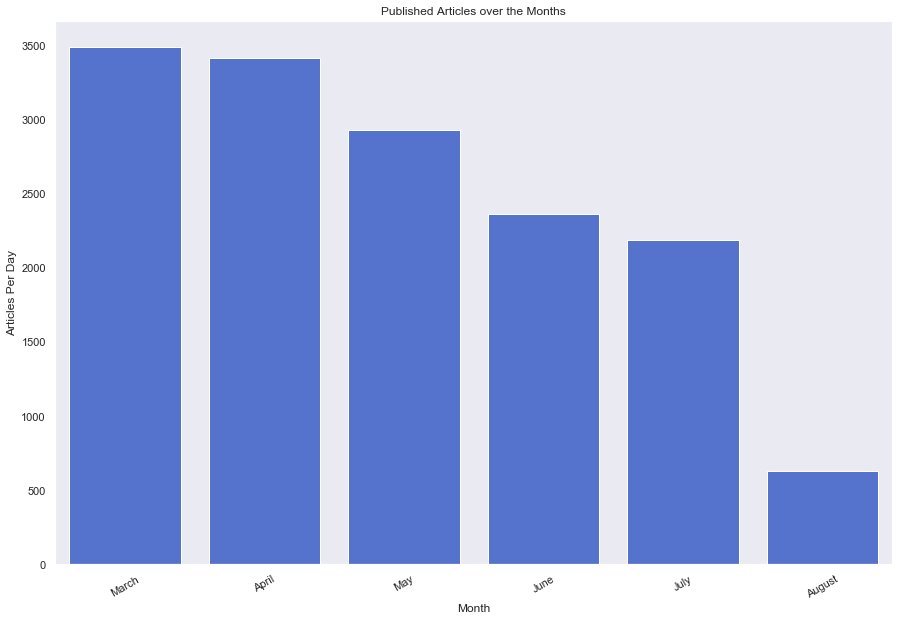

In [15]:
news['MONTH'] = news['TIMESTAMP'].apply(lambda date: date.month)
news['DAY'] = news['TIMESTAMP'].apply(lambda date: date.day)

# Some months have 30 and others have 30 days. The first and last months in our dataset and not whole.
month_days = {
    3: 21,
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 27
}
articles_per_day = {}
for month in month_days:
    n_articles = len(news[news['MONTH'] == month])
    articles_per_day[month] = n_articles / month_days[month]

month_map = {
    '3': 'March',
    '4': 'April',
    '5': 'May',
    '6': 'June',
    '7': 'July',
    '8': 'August'
}

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(ax=ax, x=list(articles_per_day.keys()), y=list(articles_per_day.values()), color='royalblue')
ax.set_xlabel("Month")
ax.set_ylabel("Articles Per Day")
ax.set_title('Published Articles over the Months')
ax.set_xticklabels([month_map[x.get_text()] for x in ax.get_xticklabels()], rotation=30)
plt.show()

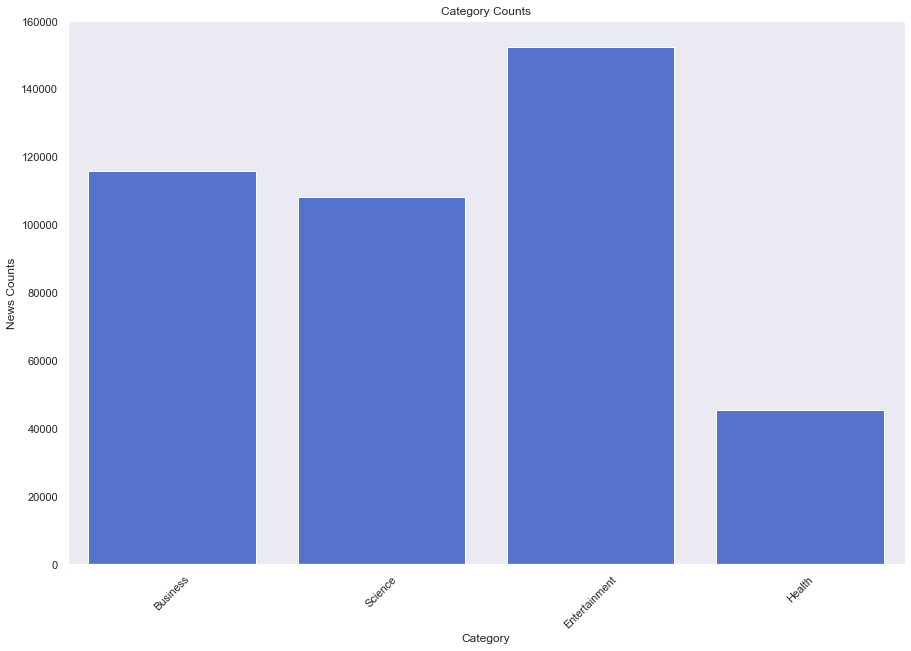

In [16]:
cat_map = {
    'b': 'Business',
    't': 'Science',
    'e': 'Entertainment',
    'm': 'Health'
}
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(ax=ax, x=news['CATEGORY'], color="royalblue")
ax.set_title("Category Counts")
ax.set_xlabel("Category")
ax.set_ylabel("News Counts")
# Manipulate the labels to make them more readable
ax.set_xticklabels([cat_map[x.get_text()] for x in ax.get_xticklabels()], rotation=45)
plt.show()

In [17]:
from collections import Counter

# Byte magic to style print output
def emphasize(s):
    """Bold the string to help get the print reader's attention.
    
    Parameters
    ----------
    s : str
        String to be decorated with bold.
    
    Returns
    -------
    str
        The string in bold.
    """
    red = '\x1b[1;31m'
    stop = '\x1b[0m'
    return red + str(s) + stop

nunique = news['PUBLISHER'].nunique()
print("There are {} different publishers. Below some of the most common:".format(emphasize(nunique)))
for key, value in Counter(news['PUBLISHER']).most_common(5):
    print("   {} posted {} articles".format(emphasize(key), emphasize(value)))

There are 10985 different publishers. Below some of the most common:
   Reuters posted 3902 articles
   Huffington Post posted 2455 articles
   Businessweek posted 2395 articles
   Contactmusic.com posted 2334 articles
   Daily Mail posted 2254 articles


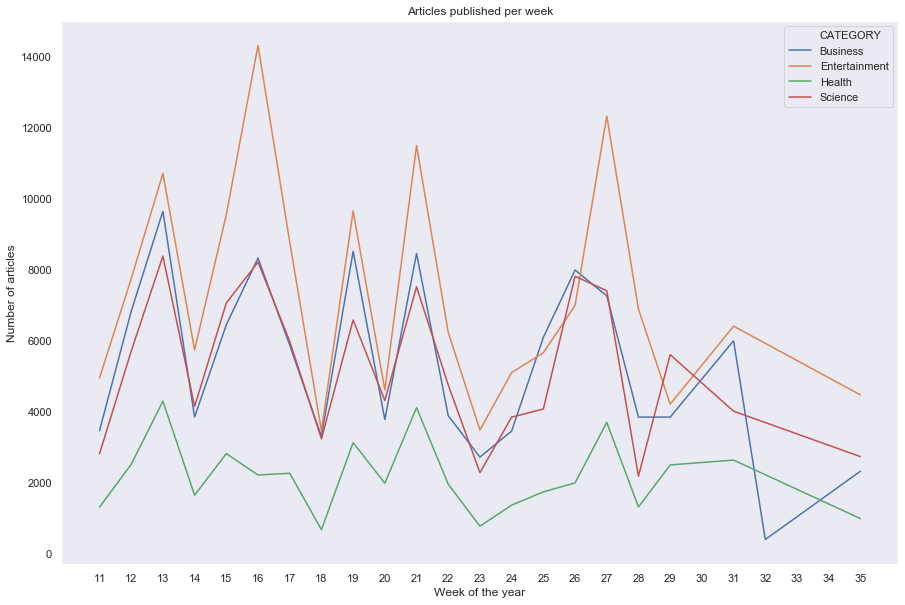

In [18]:
news['WEEK'] = news['TIMESTAMP'].apply(lambda date: date.week)

# Aggregate by week
aggregated = news[['WEEK', 'MONTH', 'CATEGORY']]
grouped = aggregated.groupby(['WEEK', 'CATEGORY']).size().reset_index(name='article_count')
grouped['CATEGORY'] = grouped['CATEGORY'].apply(lambda x: cat_map[x])

plt.figure(figsize=(15, 10))
ax = sns.lineplot(x='WEEK', y='article_count', hue='CATEGORY', data=grouped, ci=None)
ax.set_xticks(list(range(11, 36)))
ax.set_xlabel("Week of the year")
ax.set_ylabel("Number of articles")
ax.set_title("Articles published per week")
plt.show()

In [19]:
news

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,MONTH,DAY,WEEK
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,2014-03-10 16:52:50.698,3,10,11
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,2014-03-10 16:52:51.207,3,10,11
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.550,3,10,11
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.793,3,10,11
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,2014-03-10 16:52:52.027,3,10,11
...,...,...,...,...,...,...,...,...,...,...,...
422414,422933,Surgeons to remove 4-year-old's rib to rebuild...,http://www.cbs3springfield.com/story/26378648/...,WSHM-TV,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.cbs3springfield.com,2014-08-28 12:33:10.251,8,28,35
422415,422934,Boy to have surgery on esophagus after battery...,http://www.wlwt.com/news/boy-to-have-surgery-o...,WLWT Cincinnati,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wlwt.com,2014-08-28 12:33:10.508,8,28,35
422416,422935,Child who swallowed battery to have reconstruc...,http://www.newsnet5.com/news/local-news/child-...,NewsNet5.com,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.newsnet5.com,2014-08-28 12:33:10.771,8,28,35
422417,422936,Phoenix boy undergoes surgery to repair throat...,http://www.wfsb.com/story/26368078/phoenix-boy...,WFSB,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wfsb.com,2014-08-28 12:33:11.071,8,28,35


In [20]:
news['TITLE_LEN'] = news['TITLE'].str.split(' ').apply(len)

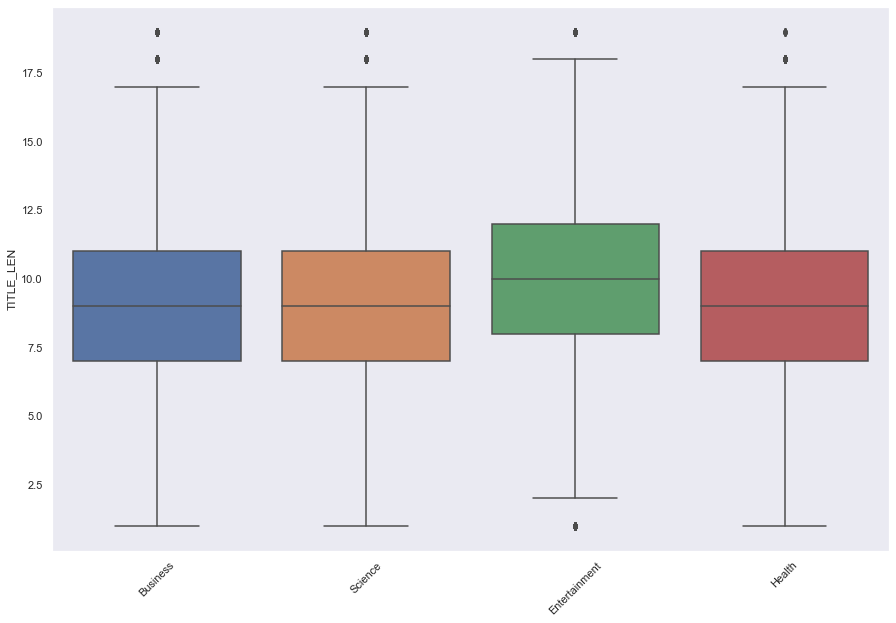

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(ax=ax, x="CATEGORY", y="TITLE_LEN", data=news[news['TITLE_LEN']<20])
ax.set_xlabel('')
ax.set_xticklabels([cat_map[x.get_text()] for x in ax.get_xticklabels()], rotation=45)
plt.show()

In [22]:
news[news['TITLE_LEN']<20].shape

(422376, 12)

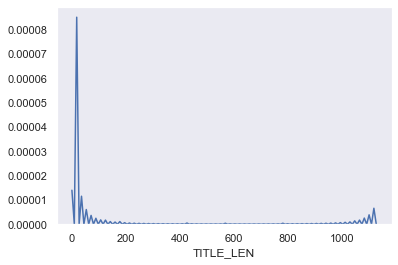

In [23]:
sns.distplot(news["TITLE_LEN"],hist = False)

In [24]:
news["TITLE_LEN"].unique()

array([  12,   11,    9,    8,   14,   10,    6,    7,   13,    4,    2,
         15,    5,   17,    3,   16,    1,   19,   20,   18,  777, 1125,
         48,  424, 1053,   21, 1040,  125,  177,  565])

In [25]:
news[news['TITLE_LEN']==21]

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,MONTH,DAY,WEEK,TITLE_LEN
119035,119371,'I did not kill my wife - I am not a murderer'...,http://www.independent.ie/entertainment/movies...,Irish Independent,e,dplR3ISnkkn9qbM8zYnygjzuPNkfM,www.independent.ie,2014-04-15 19:56:47.865,4,15,16,21
137002,137338,"For the first time, fans can bid on a visit to...",http://www.hypable.com/2014/04/18/game-of-thro...,Hypable,e,dFVFeuMI8YtTrgM1IJ682jjQOmG-M,www.hypable.com,2014-04-19 07:28:43.473,4,19,16,21
273480,273926,"If you have an iPhone, iPad or a Mac, Apple ju...",http://www.tampabay.com/blogs/latest-gadgets/a...,Tampabay.com \(blog\),t,ddXI9ba1qZ8OCNM9ls1xCgbP5DUlM,www.tampabay.com,2014-06-04 14:55:39.811,6,4,23,21
358897,359357,One glass of wine or a beer at the age of 14 c...,http://www.dailymail.co.uk/health/article-2678...,Daily Mail,m,d38fEHmL8Y-8aSM8by64-SStksZBM,www.dailymail.co.uk,2014-07-05 05:25:34.706,7,5,27,21
385758,386218,Dawn of the Planet of the Apes and Rise of the...,http://boingboing.net/2014/07/16/dawn-of-the-p...,Boing Boing,e,dg1oEqkwu3pgVxMlU7dETV69aCIBM,boingboing.net,2014-07-17 05:59:56.374,7,17,29,21
